HAPPYMONK TECHNOLOGY INTERNSHIP ASSIGNMENT
NAME: PRADEEP G
DATASET : BANK-NOTE AUTHENTICATION

In [17]:
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [19]:
X = df.drop('class',axis=1)
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [20]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [21]:
y_test.value_counts()

0    164
1    111
Name: class, dtype: int64

In [22]:
def myfunc(x, k0,k1):
    return k1+(k0*x)

In [23]:
from tensorflow.keras.layers import Layer

class MyFunc(Layer):

    def __init__(self, k0=1.0, k1=1.0, trainable=True, **kwargs):
        super(MyFunc, self).__init__(**kwargs)
        self.supports_masking = True
        self.k0 = k0
        self.k1 = k1
        self.trainable = trainable

    def build(self, input_shape):
        self.k0_factor = K.variable(self.k0,
                                      dtype=K.floatx(),
                                      name='k0_factor')
        self.k1_factor = K.variable(self.k1,
                                      dtype=K.floatx(),
                                      name='k1_factor')
        if self.trainable:
            self._trainable_weights.append(self.k0_factor)
            self._trainable_weights.append(self.k1_factor)

        super(MyFunc, self).build(input_shape)

    def call(self, inputs, mask=None):
        return myfunc(inputs, self.k0_factor ,self.k1_factor)

    def get_config(self):
        config = {'k0': self.get_weights()[0] if self.trainable else self.k0,
                  'k1': self.get_weights()[1] if self.trainable else self.k1,
                  'trainable': self.trainable}
        base_config = super(MyFunc, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

In [24]:
model_neural = keras.Sequential([keras.layers.Dense(3,kernel_initializer='he_uniform',activation=MyFunc(k0=1, k1=1, trainable=True),input_shape=(4,)),
                             keras.layers.Dense(1,activation='sigmoid')])
model_neural.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 17        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5,restore_best_weights=True,monitor = 'loss')
history = model_neural.fit(X_train_mm,y_train,epochs=150)

Epoch 1/150
35/35 [==============================] - 1s 1ms/step - loss: 0.7748 - accuracy: 0.5323
Epoch 2/150
35/35 [==============================] - 0s 1ms/step - loss: 0.7308 - accuracy: 0.5342
Epoch 3/150
35/35 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.5481
Epoch 4/150
35/35 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5395
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5460
Epoch 6/150
35/35 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.5676
Epoch 7/150
35/35 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.5801
Epoch 8/150
35/35 [==============================] - 0s 1ms/step - loss: 0.6541 - accuracy: 0.5986
Epoch 9/150
35/35 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.6302
Epoch 10/150
35/35 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.6666
Epoch 11/

In [26]:
predictions = model_neural.predict(X_test_mm)
test_predictions = []
for i in predictions:
    for j in i:
        test_predictions.append(j)
test_predictions = np.array(test_predictions)
test_predictions = np.where(test_predictions>0.5,1,0)
test_accuracy = accuracy_score(test_predictions,y_test)

In [27]:
model_neural.weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.3973413 , -1.1096922 ,  2.2444866 ],
        [-0.5127022 , -0.7905073 ,  1.7900772 ],
        [ 0.6602989 , -1.9392226 ,  0.549137  ],
        [-0.68294764,  1.0112927 ,  0.6985045 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(3,) dtype=float32, numpy=array([-1.0869722,  1.398711 , -1.2452629], dtype=float32)>,
 <tf.Variable 'dense_2/my_func_1/k0_factor:0' shape=() dtype=float32, numpy=4.227505>,
 <tf.Variable 'dense_2/my_func_1/k1_factor:0' shape=() dtype=float32, numpy=0.23714694>,
 <tf.Variable 'dense_3/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[-1.0162227],
        [ 1.941779 ],
        [-1.7188673]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.88326675], dtype=float32)>]

In [28]:
con_mat = confusion_matrix(y_test,test_predictions)
con_mat

array([[160,   4],
       [  2, 109]], dtype=int64)

In [29]:
F1_score = f1_score(y_test,test_predictions)

Text(0.5, 1.0, 'training_accuracy against epochs')

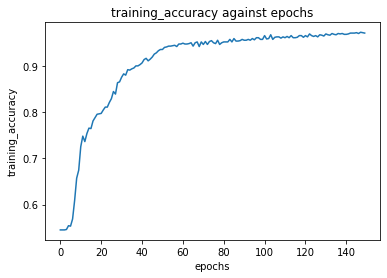

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('training_accuracy')
plt.title('training_accuracy against epochs')

Text(0.5, 1.0, 'training_loss against epochs')

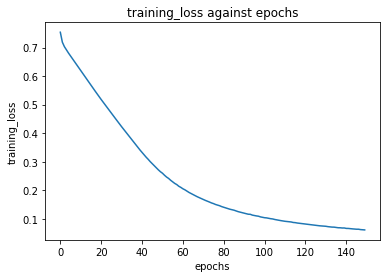

In [31]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('training_loss')
plt.title('training_loss against epochs')

In [32]:
print("INITIAL VALUE OF k0: 1")
print("OPTIMAL VALUE OF k0 AFTER 150 epochs:",model_neural.get_weights()[2])
print("INITIAL VALUE OF k1: 1")
print("OPTIMAL VALUE OF k1 AFTER 150 epochs:",model_neural.get_weights()[3])
print("TEST ACCURACY:",test_accuracy)
print("F1 Score:",F1_score)

INITIAL VALUE OF k0: 1
OPTIMAL VALUE OF k0 AFTER 150 epochs: 4.227505
INITIAL VALUE OF k1: 1
OPTIMAL VALUE OF k1 AFTER 150 epochs: 0.23714694
TEST ACCURACY: 0.9781818181818182
F1 Score: 0.9732142857142857
